# IMPORTING LIBRARIES

In [99]:
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.datasets import mnist

# LOADING THE DATA

In [100]:
(X_train,_), (X_test,_) = mnist.load_data()

# NORMALIZING THE PIXEL VALUES

In [101]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [102]:
X_train.shape

(60000, 28, 28)

In [103]:
X_test.shape

(10000, 28, 28)

# Flattening the images into 1-D arrays

In [104]:
X_train = X_train.reshape(X_train.shape[0], 784) # 28*28 = 784
X_test = X_test.reshape(X_test.shape[0], 784)

# BUILDING THE AUTO-ENCODER MODEL

In [105]:
input_img = Input(shape=(784,))

encoded = Dense(32,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

encoder_model = Model(input_img, encoded)
decoder_model = Model(encoded,decoded)

autoencoder = Sequential()
autoencoder.add(encoder_model)
autoencoder.add(decoder_model)

# COMPILING THE Auto-Encoder Model

In [106]:
autoencoder.compile(loss='mean_squared_error',optimizer='adam')

# TRAINING THE AUTO-ENCODER MODEL

In [107]:
history = autoencoder.fit(X_train,X_train,epochs=10, validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - val_loss: 0.0160
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0134 - val_loss: 0.0113
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

# VISUALIZATION

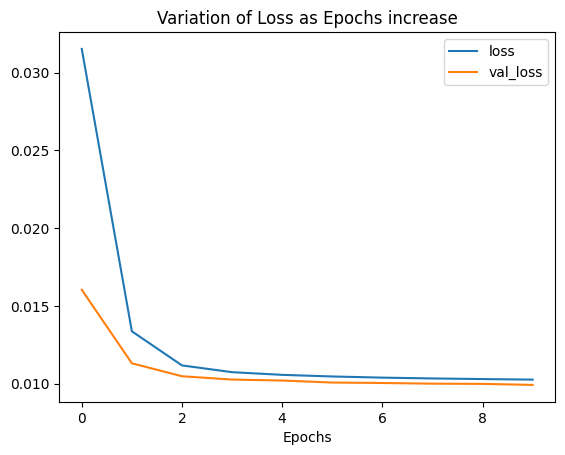

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel("Epochs")
plt.title("Variation of Loss as Epochs increase")
plt.show()

In [109]:
encoded_img = encoder_model.predict(X_test)
decoded_img = decoder_model.predict(encoded_img)

313/313 [==============================] - 0s 1ms/step


Original Image


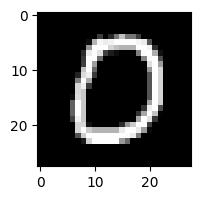

In [110]:
print("Original Image")
plt.figure(figsize=(2,2))
plt.imshow(X_test[10].reshape(28,28))
plt.gray()
plt.show()

Encoded Image


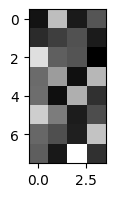

In [113]:
print("Encoded Image")
plt.figure(figsize=(2,2))
plt.imshow(encoded_img[10].reshape(8,4))
plt.gray()
plt.show()

Decoded Image


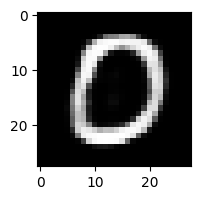

In [114]:
print("Decoded Image")
plt.figure(figsize=(2,2))
plt.imshow(decoded_img[10].reshape(28,28))
plt.gray()
plt.show()